<a href="https://colab.research.google.com/github/maggie8801/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 11/30課程

####資料預處理，讀檔

In [94]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x:'%.2f'% x) #如果pandas讀到float型態的資料會顯示到小數點第二位

In [95]:
data = pd.read_csv("/content/drive/MyDrive/Jourdeness/data3_project.csv")

In [96]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04


In [97]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00,9100000595826.00,中區,2010-03-15,2012-07-11
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00,9100003028369.00,竹區,2020-12-08,2020-11-26
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00,9100003028369.00,竹區,2020-12-08,2020-11-26
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00,9100003028369.00,竹區,2020-12-08,2020-11-26
1404434,PS5219002028,GAXFG2,真正除臭抗菌噴霧(銀離子迷迭香)350ml,8.00,2020-12-31,441.00,9100003039464.00,竹區,2020-12-23,2020-12-10


#### 抓出Quantity大於2的交易資料，欄位顯示有StockCode， Description，Quantity，InvoiceDate， UnitPrice​

In [119]:
data2 = data[['StockCode','Description','Quantity','InvoiceDate','UnitPrice']]

In [120]:
data2[data2['Quantity']>2] #抓出大於2的交易

,StockCode,Description,Quantity,InvoiceDate,UnitPrice
0,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00
1,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00
2,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00
4,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00
5,K8018,植粹養護潤髮乳475ml,8.00,2019-01-01,549.00
...,...,...,...,...,...
1404430,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00
1404431,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00
1404432,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00
1404433,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00


#### 顯示index為1000的那筆資料的member_code與Description

In [121]:
data3 = data[['CustomerID','Description']]

In [122]:
data3.iloc[1000]

CustomerID    9100001536064.00
Description        頭部活氧熱舒壓課程單堂
Name: 1000, dtype: object

In [123]:
data.iloc[1000,[2,6]] #做法跟122一樣意思

Description        頭部活氧熱舒壓課程單堂
CustomerID    9100001536064.00
Name: 1000, dtype: object

In [124]:
data.iloc[1000,2:7:4] #做法跟122一樣意思

Description        頭部活氧熱舒壓課程單堂
CustomerID    9100001536064.00
Name: 1000, dtype: object

## 12/7課程

#### Data Wrangling

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404435 entries, 0 to 1404434
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   InvoiceNo          1404435 non-null  object 
 1   StockCode          1404435 non-null  object 
 2   Description        1404435 non-null  object 
 3   Quantity           1404435 non-null  float64
 4   InvoiceDate        1404435 non-null  object 
 5   UnitPrice          1404435 non-null  float64
 6   CustomerID         1403724 non-null  float64
 7   Country            1404435 non-null  object 
 8   member_start_date  1366651 non-null  object 
 9   first_trans_date   1400412 non-null  object 
dtypes: float64(3), object(7)
memory usage: 107.2+ MB


In [99]:
data.shape #看維度(2維(roll, column))

(1404435, 10)

In [100]:
data.Description.value_counts() #也可以打成data["Description"].value_counts() #value_counts()通常用於type為object的欄位，當然float也可以查看但對資料處理沒幫助

全背順氣活力SPA課程單堂                   58636
清除環境中腸病毒濕紙巾10抽                  52599
plus5智頻美塑儀課程單堂                  46660
(新)溫熱刮痧課程單堂                     34129
全身健康優化SPA課程單堂                   33770
                                ...  
古典山茶花滋養油500ml-職業包                   1
護肝排毒療程單堂(原價)                        1
精準無痕BOTOX(員工特惠)90U                  1
玫瑰晶萃水面膜250ml-職業包                    1
晶透亮白超皮秒透亮美肌加強版(S1 S2 S3)(原價)        1
Name: Description, Length: 870, dtype: int64

In [101]:
#data.Quantity.value_counts() #果然看不出什麼所以然

In [102]:
#data['Country'] #看一個欄位
#data[['StockCode','Description','Quantity','InvoiceDate','UnitPrice']] #看所有特定欄位

In [103]:
data.isna().any() #看有無空值

InvoiceNo            False
StockCode            False
Description          False
Quantity             False
InvoiceDate          False
UnitPrice            False
CustomerID            True
Country              False
member_start_date     True
first_trans_date      True
dtype: bool

In [104]:
data.loc[data['CustomerID'].isnull()] #customerID是空值的代表是員工用公司扣答買的，但若是員工自掏腰包購買則也會有customerID

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
1544,PS1001008016,MD-1265,2019營運售全背,32.00,2019-01-03,1859.00,nan,總管理處,NaN,NaN
1545,PS1001008016,JZA4G2,輕鬆．清新複方按摩油30ml,40.00,2019-01-03,2699.00,nan,總管理處,NaN,NaN
3470,PS1001008018,MD-1266,2019營運售太極,8.00,2019-01-05,509.00,nan,總管理處,NaN,NaN
3471,PS1001008018,K8016,植粹清香沐浴精500ml,8.00,2019-01-05,497.00,nan,總管理處,NaN,NaN
3472,PS1001008018,K8017,植粹養護洗髮精500ml,8.00,2019-01-05,497.00,nan,總管理處,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1370084,PS5525021426,BJ079,佐登妮絲６號複方精油10ml,8.00,2020-12-14,1099.00,nan,高屏全區,NaN,NaN
1370085,PS5525021426,JYA1G1,玫瑰複方精油5ml HALAL,8.00,2020-12-14,1099.00,nan,高屏全區,NaN,NaN
1382674,PS5455008904,ZFE02,工本費,8.00,2020-12-21,509.00,nan,南區,NaN,NaN
1396234,PS5414018463,JZB4G1,呼暢護隨精油30ml,-8.00,2020-12-28,-1720.00,nan,南區,NaN,NaN


In [105]:
data.drop(data[data['CustomerID'].isnull()].index, inplace=True) #去空值

In [106]:
data.shape

(1403724, 10)

In [107]:
data.loc[(data['Quantity']<0) | (data['UnitPrice']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21
19,PS5323017890,K0464B,DC龍血緊緻修護面膜26ml+5g-單包,-56.00,2019-01-01,-1006.00,9100000045758.00,中區,2001-05-20,2012-07-17
20,PS5323017890,K0464B,DC龍血緊緻修護面膜26ml+5g-單包,-8.00,2019-01-01,-205.00,9100000045758.00,中區,2001-05-20,2012-07-17
252,PS5381011345,KQ03,玫瑰晶萃露15ml,-8.00,2019-01-01,-1501.00,9100000356694.00,中區,2002-02-03,2012-10-06
253,PS5381011345,KQ03,玫瑰晶萃露15ml,-8.00,2019-01-01,-1501.00,9100000356694.00,中區,2002-02-03,2012-10-06
...,...,...,...,...,...,...,...,...,...,...
1404039,PS5217034487,JAA3G3,膠原蛋白青春精華94%原液60ml,-8.00,2020-12-31,-2031.00,9100003026129.00,台北B區,2020-12-10,2020-11-23
1404040,PS5217034487,JAA3G2,玻尿酸超保濕精華96%原液60ml,-8.00,2020-12-31,-2032.00,9100003026129.00,台北B區,2020-12-10,2020-11-23
1404192,PR9310000260,ENAA01B002,新逆時光藍新寶石亮白全臉單堂(單堂會員),-48.00,2020-12-31,-12941.00,9100002311295.00,佐登微爾,2018-05-05,2017-04-16
1404193,PR9310000260,ENBA01B002,新晶透亮白超皮秒透亮美肌局部單堂(單堂會員),-48.00,2020-12-31,-9941.00,9100002311295.00,佐登微爾,2018-05-05,2017-04-16


In [108]:
data.loc[(data['Quantity']<0) & (data['UnitPrice']>0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
10361,PR5524003613,9269,JOURDENESS精油包,-8.00,2019-01-11,59.00,9100000538601.00,高屏全區,2009-02-09,2012-11-28
14317,PR5374002987,9277,歐式古典花語陶瓷鍋墊,-8.00,2019-01-12,59.00,9100002127370.00,彰雲區,2016-03-27,2016-03-27
14318,PR5374002987,9277,歐式古典花語陶瓷鍋墊,-8.00,2019-01-12,59.00,9100002127370.00,彰雲區,2016-03-27,2016-03-27
18308,PR5538001155,9277,歐式古典花語陶瓷鍋墊,-8.00,2019-01-15,59.00,9100000533811.00,高屏全區,2008-12-29,2012-10-04
18309,PR5538001155,9277,歐式古典花語陶瓷鍋墊,-8.00,2019-01-15,59.00,9100000533811.00,高屏全區,2008-12-29,2012-10-04
...,...,...,...,...,...,...,...,...,...,...
1340292,PR5142004025,K8013,PURE純淨沐浴精250ml,-8.00,2020-11-29,59.00,9100001032627.00,台北B區,2004-10-18,2015-11-13
1340293,PR5142004025,BJ075CS,JD 薄荷30ml-職業包 HALAL,-8.00,2020-11-29,59.00,9100001032627.00,台北B區,2004-10-18,2015-11-13
1340294,PR5142004025,K8013,PURE純淨沐浴精250ml,-8.00,2020-11-29,59.00,9100001032627.00,台北B區,2004-10-18,2015-11-13
1352683,PR536F001044,ZCP04,課程預付卡,-8.00,2020-12-05,59.00,9100003035650.00,彰雲區,NaN,NaN


In [109]:
data.loc[(data['Quantity']>0) & (data['UnitPrice']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date


In [110]:
data['Revenue'] = data['Quantity'] * abs(data['UnitPrice'])
data['Revenue']

0          10072.00
1           6712.00
2           6712.00
3         -12008.00
4           5376.00
             ...   
1404430    47136.00
1404431     2472.00
1404432     8752.00
1404433     2640.00
1404434     3528.00
Name: Revenue, Length: 1403724, dtype: float64

In [111]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00


In [112]:
data.Revenue.describe() #發現標準差很大，代表資料異常

count     1403724.00
mean        82668.84
std        922440.49
min     -41471304.00
25%          4672.00
50%          8752.00
75%         25904.00
max     702441768.00
Name: Revenue, dtype: float64

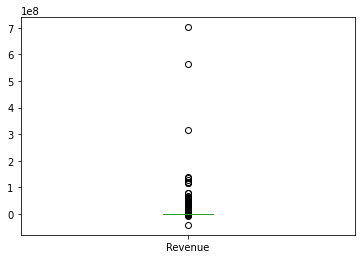

In [113]:
data['Revenue'].plot.box() #畫箱型圖(看有無異常值，會影響分群結果)

In [114]:
data1 = data.copy()

#### Z-score
##### Outlier = Observations with z-scores>3 or <-3

In [115]:
data['Revenue_zcore'] = (data['Revenue']-data['Revenue'].mean())/data['Revenue'].std(ddof=0) #ddof=0
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,Revenue_zcore
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,-0.08
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,-0.08
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,-0.08
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,-0.10
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,-0.08


In [116]:
data['Outlier'] = (abs(data['Revenue_zcore'])>3).astype(int) #把true跟false變成0,1
data.loc[data['Outlier']>0, ['Revenue','Revenue_zcore']] #列出有異常值的

,Revenue,Revenue_zcore
1699,4844064.00,5.16
4458,4023600.00,4.27
4668,5788320.00,6.19
5070,11329248.00,12.19
6362,4023600.00,4.27
...,...,...
1402112,6006792.00,6.42
1402113,4755136.00,5.07
1402115,5851016.00,6.25
1402120,17226552.00,18.59


In [117]:
data.loc[data['Outlier']==0, ['Revenue','Revenue_zcore']] #列出沒有異常值的(正常的)

,Revenue,Revenue_zcore
0,10072.00,-0.08
1,6712.00,-0.08
2,6712.00,-0.08
3,-12008.00,-0.10
4,5376.00,-0.08
...,...,...
1404430,47136.00,-0.04
1404431,2472.00,-0.09
1404432,8752.00,-0.08
1404433,2640.00,-0.09


In [118]:
data = data[data['Outlier']==0]
data.shape

(1403032, 13)

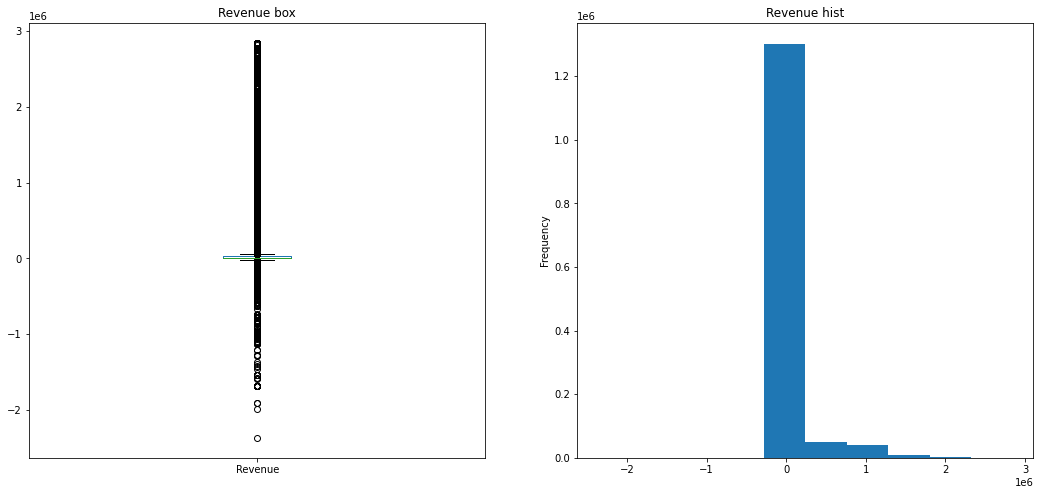

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1,2,figsize=(18,8))
data['Revenue'].plot.box(ax=axis[0]) #箱型圖看四分位距
axis[0].set_title('Revenue box')
data['Revenue'].plot.hist(ax=axis[1]) #看密度
axis[1].set_title('Revenue hist')
plt.show()

#### IQR
##### IQR = Q3-Q1
##### Outliers = Observations>Q3+1.5IQR or Q1-1.5IQR

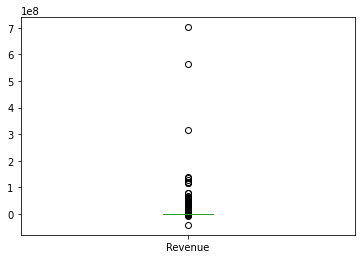

In [126]:
data1['Revenue'].plot.box()

In [129]:
def Outlier_treatment(datacolumn):
  Q1, Q3 = np.percentile(datacolumn, [25,75])
  IQR = Q3-Q1
  lower_range = Q1-(1.5*IQR)
  high_range = Q3+(1.5*IQR)
  return lower_range, high_range

In [130]:
lowerbound, highbound = Outlier_treatment(data1['Revenue'])

data1[(data1['Revenue']<lowerbound) | (data1['Revenue']>highbound)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
9,PS5262016031,HA89A01,肌因彈潤課程單堂,48.00,2019-01-01,9559.00,9100000407160.00,竹區,2007-01-02,2012-07-28,458832.00
10,PS5262016032,HB90A01,全背順氣活力SPA課程單堂,96.00,2019-01-01,11559.00,9100000407160.00,竹區,2007-01-02,2012-07-28,1109664.00
13,PS530A050714,FB40A01,旗艦暖宮腹活SPA課程單堂,96.00,2019-01-01,13259.00,9100002554883.00,中區,2018-10-18,2018-10-18,1272864.00
19,PS5323017890,K0464B,DC龍血緊緻修護面膜26ml+5g-單包,-56.00,2019-01-01,-1006.00,9100000045758.00,中區,2001-05-20,2012-07-17,-56336.00
31,PS5213017253,HA50A01,胜肽美顏SPA護理單堂,48.00,2019-01-01,6059.00,9100001531076.00,台北B區,2013-11-23,2013-04-09,290832.00
...,...,...,...,...,...,...,...,...,...,...,...
1404400,PS5324024939,JAA3G2,玻尿酸超保濕精華96%原液60ml,16.00,2020-12-31,4239.00,9100000043037.00,中區,2004-11-11,2012-07-23,67824.00
1404401,PS5324024939,KQ02,玫瑰晶萃活膚液130ml,24.00,2020-12-31,5395.00,9100000043037.00,中區,2004-11-11,2012-07-23,129480.00
1404418,PS5324024940,KQ06,玫瑰晶萃瞬效霜30ml,16.00,2020-12-31,4083.00,9100000706055.00,中區,2011-12-21,2014-03-10,65328.00
1404421,PS5324024940,MAA7G1,白金密集煥白面膜18ml*6pcs,32.00,2020-12-31,6923.00,9100000706055.00,中區,2011-12-21,2014-03-10,221536.00


In [132]:
data1.drop(data1[(data1['Revenue']<lowerbound) | (data1['Revenue']>highbound)].index, inplace=True)

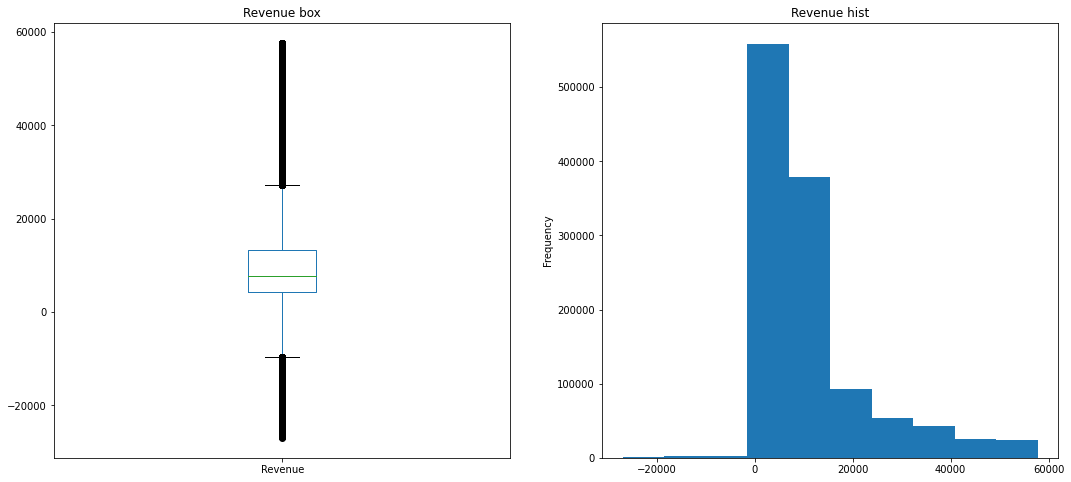

In [133]:
figure, axis = plt.subplots(1,2,figsize=(18,8))
data1['Revenue'].plot.box(ax=axis[0]) #箱型圖看四分位距
axis[0].set_title('Revenue box')
data1['Revenue'].plot.hist(ax=axis[1]) #看密度
axis[1].set_title('Revenue hist')
plt.show()

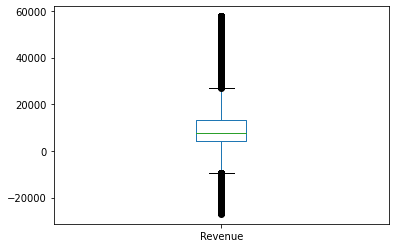

In [146]:
#data1['Revenue'].plot.box() #這樣也可以畫圖喔
#plt.show()

### EDA

#### Sales data畫圖- Monthly Revenue

In [134]:
data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00


In [135]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181196 entries, 0 to 1404434
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   InvoiceNo          1181196 non-null  object 
 1   StockCode          1181196 non-null  object 
 2   Description        1181196 non-null  object 
 3   Quantity           1181196 non-null  float64
 4   InvoiceDate        1181196 non-null  object 
 5   UnitPrice          1181196 non-null  float64
 6   CustomerID         1181196 non-null  float64
 7   Country            1181196 non-null  object 
 8   member_start_date  1144520 non-null  object 
 9   first_trans_date   1177960 non-null  object 
 10  Revenue            1181196 non-null  float64
dtypes: float64(4), object(7)
memory usage: 108.1+ MB


In [136]:
data1['InvoiceDate'] = pd.to_datetime(data1['InvoiceDate'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181196 entries, 0 to 1404434
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   InvoiceNo          1181196 non-null  object        
 1   StockCode          1181196 non-null  object        
 2   Description        1181196 non-null  object        
 3   Quantity           1181196 non-null  float64       
 4   InvoiceDate        1181196 non-null  datetime64[ns]
 5   UnitPrice          1181196 non-null  float64       
 6   CustomerID         1181196 non-null  float64       
 7   Country            1181196 non-null  object        
 8   member_start_date  1144520 non-null  object        
 9   first_trans_date   1177960 non-null  object        
 10  Revenue            1181196 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 108.1+ MB


In [142]:
#data1.InvoiceDate.dt.month

0           1
1           1
2           1
3           1
4           1
           ..
1404430    12
1404431    12
1404432    12
1404433    12
1404434    12
Name: InvoiceDate, Length: 1181196, dtype: int64

In [137]:
data1['YearMonth'] = data1['InvoiceDate'].map(lambda date: 100*date.year+date.month)
data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,201901
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,201901
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,201901


In [143]:
tx_revenue = data1.groupby(['YearMonth'])['Revenue'].sum().reset_index()
tx_revenue

,YearMonth,Revenue
0,201901,425743824.00
1,201902,300617976.00
2,201903,699778888.00
3,201904,516812544.00
4,201905,551044368.00
5,201906,453681976.00
6,201907,480213760.00
7,201908,500785128.00
8,201909,553368896.00
9,201910,643763416.00


In [144]:
tx_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  24 non-null     int64  
 1   Revenue    24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes


In [145]:
tx_revenue['YearMonth'] = tx_revenue['YearMonth'].astype(str) #把x軸的資料由數值轉成字串，畫圖才不會怪怪
tx_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  24 non-null     object 
 1   Revenue    24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 512.0+ bytes


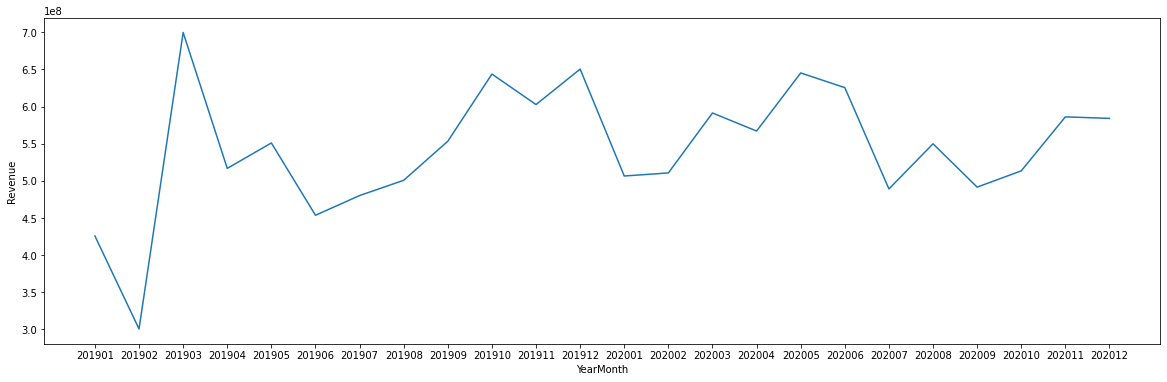

In [149]:
figure, axes = plt.subplots(figsize=(20,6))
sns.lineplot(ax=axes, x='YearMonth', y='Revenue', data=tx_revenue) #ax=axes可以不寫
plt.show()

#### Sales data畫圖- Monthly Growth Rate

In [150]:
tx_revenue['GrowthRate'] = tx_revenue['Revenue'].pct_change() #成長率公式，算出該欄位跟前一個roll的revenue差異百分比
tx_revenue

,YearMonth,Revenue,GrowthRate
0,201901,425743824.00,nan
1,201902,300617976.00,-0.29
2,201903,699778888.00,1.33
3,201904,516812544.00,-0.26
4,201905,551044368.00,0.07
5,201906,453681976.00,-0.18
6,201907,480213760.00,0.06
7,201908,500785128.00,0.04
8,201909,553368896.00,0.11
9,201910,643763416.00,0.16


In [151]:
tx_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YearMonth   24 non-null     object 
 1   Revenue     24 non-null     float64
 2   GrowthRate  23 non-null     float64
dtypes: float64(2), object(1)
memory usage: 704.0+ bytes


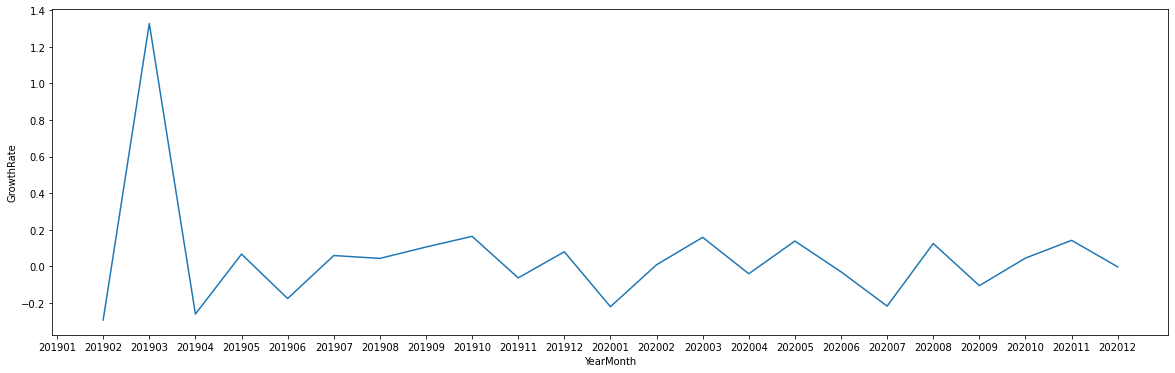

In [152]:
figure, axes = plt.subplots(figsize=(20,6))
sns.lineplot(ax=axes, x='YearMonth', y='GrowthRate', data=tx_revenue) #ax=axes可以不寫
plt.show()

#### Sales data畫圖- Monthly Order Count

In [159]:
tx_sales_qty = data1.groupby(['YearMonth'])['Quantity'].sum().reset_index()
tx_sales_qty

,YearMonth,Quantity
0,201901,372096.00
1,201902,243576.00
2,201903,760144.00
3,201904,514888.00
4,201905,489304.00
5,201906,406304.00
6,201907,407536.00
7,201908,449040.00
8,201909,453488.00
9,201910,648960.00


In [160]:
tx_sales_qty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  24 non-null     int64  
 1   Quantity   24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes


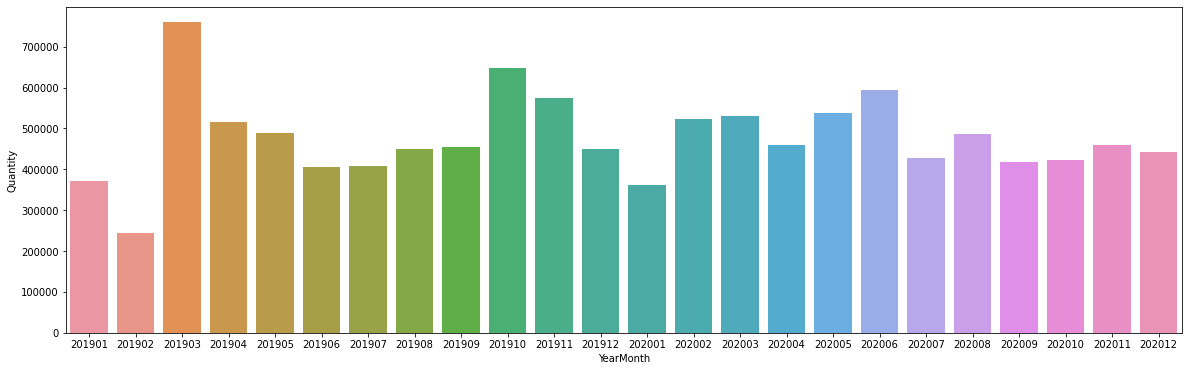

In [161]:
figure, axes = plt.subplots(figsize=(20,6))
sns.barplot(ax=axes, x='YearMonth', y='Quantity', data=tx_sales_qty) #ax=axes可以不寫
plt.show() #可看出冬季銷售數量較差，而特定幾個月銷售數量徒增可能是當月有商品在促銷

#### Sales data畫圖- Average Revenue per Order

In [162]:
data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,201901
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,201901
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,201901


In [163]:
tx_revenue_avg = data1.groupby(['YearMonth'])['Revenue'].mean().reset_index()
tx_revenue_avg #可看出每個月銷售額平均落在9000~12000區間

,YearMonth,Revenue
0,201901,9859.97
1,201902,10893.93
2,201903,9157.61
3,201904,10094.59
4,201905,10560.05
5,201906,10836.53
6,201907,11346.94
7,201908,10429.33
8,201909,11319.58
9,201910,13218.15


In [165]:
tx_revenue_avg['YearMonth'] = tx_revenue_avg['YearMonth'].astype(str) #把x軸的資料由數值轉成字串，畫圖才不會怪怪
tx_revenue_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  24 non-null     object 
 1   Revenue    24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 512.0+ bytes


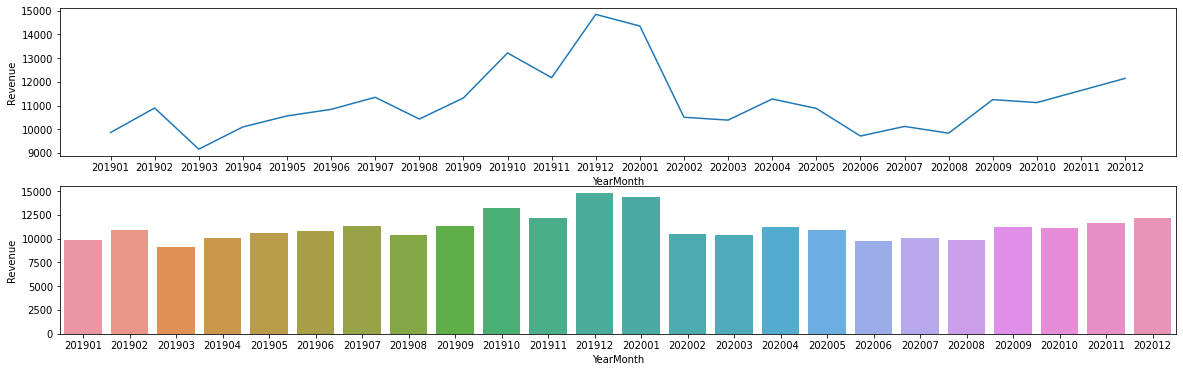

In [166]:
figure, axes = plt.subplots(2,1,figsize=(20,6)) #設定2列1欄的畫布
sns.lineplot(ax=axes[0], x='YearMonth', y='Revenue', data=tx_revenue_avg) 
sns.barplot(ax=axes[1], x='YearMonth', y='Revenue', data=tx_revenue_avg) 
plt.show()

#### Sales data畫圖- Monthly Active Customers

In [175]:
tx_monthly_actives = data1.groupby(['YearMonth'])['CustomerID'].nunique().reset_index()
tx_monthly_actives

,YearMonth,CustomerID
0,201901,11061
1,201902,8593
2,201903,15972
3,201904,11846
4,201905,12569
5,201906,11159
6,201907,10981
7,201908,12747
8,201909,12498
9,201910,14506


In [178]:
tx_monthly_actives['YearMonth'] = tx_monthly_actives['YearMonth'].astype(str) #把x軸的資料由數值轉成字串，畫圖才不會怪怪
tx_monthly_actives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YearMonth   24 non-null     object
 1   CustomerID  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


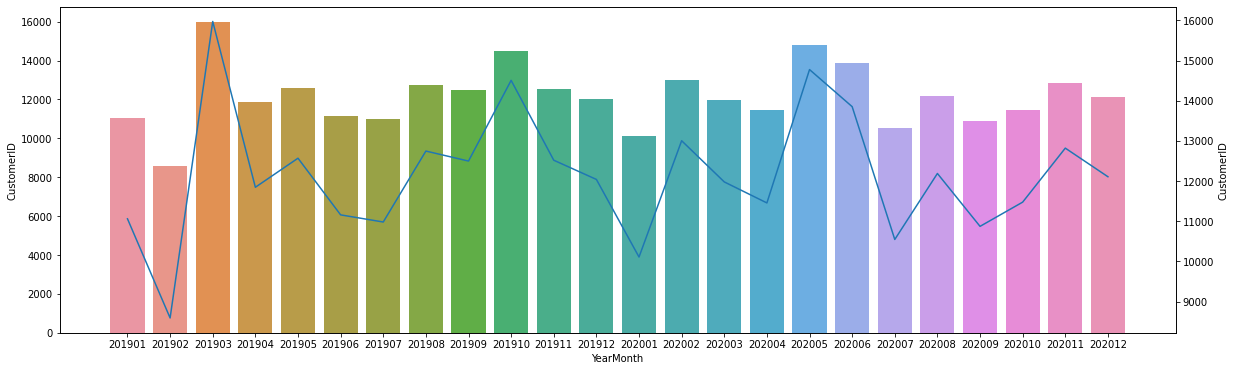

In [179]:
figure, axes1 = plt.subplots(figsize=(20,6))
sns.barplot(ax=axes1, x='YearMonth', y='CustomerID', data=tx_monthly_actives) 
axes2 = axes1.twinx()
sns.lineplot(ax=axes2, x='YearMonth', y='CustomerID', data=tx_monthly_actives)
plt.show()

#### Sales data畫圖- Revenue per month for New and Existing Customers​